In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('D:\\AI STUDY MATERIAL\\DL\\heart disease.csv')
data.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,DV
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    int64  
 1   Sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
 14  DV        303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [4]:
data.describe()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,DV
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,1.000000


In [5]:
data.shape

(303, 15)

In [6]:
data.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
DV          0
dtype: int64

In [7]:
from pandas_profiling import ProfileReport
pf=ProfileReport(data,title='ProfileReport',explorative=True)
pf.to_widgets()

In [8]:
from scipy.stats import pearsonr

In [9]:
num_columns=['Age','Sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','num']
corr=[]
for i in num_columns:
    x=pearsonr(data[i],data['DV'])
    corr.append(x)
corr

[(0.22312029469045155, 8.955636917530045e-05),
 (0.27681631639209764, 9.8519110893332e-07),
 (0.4144463879051421, 5.250734956675884e-14),
 (0.15082544959450636, 0.008548268928594888),
 (0.08516361139953135, 0.13914167020437165),
 (0.025263666975726167, 0.6613759374817316),
 (0.16920188657375612, 0.0031324013864188083),
 (-0.4171668769579609, 3.456964908430396e-14),
 (0.43189398718850175, 3.36577437210704e-15),
 (0.424510183341661, 1.0976053396985437e-14),
 (0.3392131594836671, 1.3537567141914637e-09),
 (0.8300806713408231, 2.4879432880754747e-78)]

In [10]:
x1=np.array(corr)
pvalue1=pd.Series(x1[:,1],index=num_columns)
pvalue1

Age         8.955637e-05
Sex         9.851911e-07
cp          5.250735e-14
trestbps    8.548269e-03
chol        1.391417e-01
fbs         6.613759e-01
restecg     3.132401e-03
thalach     3.456965e-14
exang       3.365774e-15
oldpeak     1.097605e-14
slope       1.353757e-09
num         2.487943e-78
dtype: float64

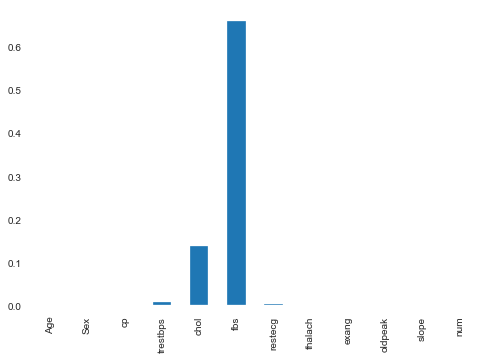

In [11]:
pvalue1.plot.bar()

In [12]:
data=data.drop(['fbs','chol'],1)

In [13]:
data.head()

,Age,Sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,num,DV
0,63,1,1,145,2,150,0,2.3,3,0,6,0,0
1,67,1,4,160,2,108,1,1.5,2,3,3,2,1
2,67,1,4,120,2,129,1,2.6,2,2,7,1,1
3,37,1,3,130,0,187,0,3.5,3,0,3,0,0
4,41,0,2,130,2,172,0,1.4,1,0,3,0,0


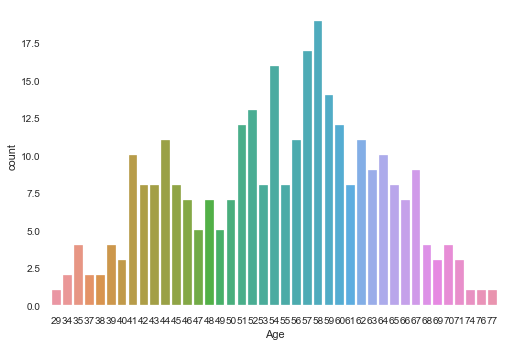

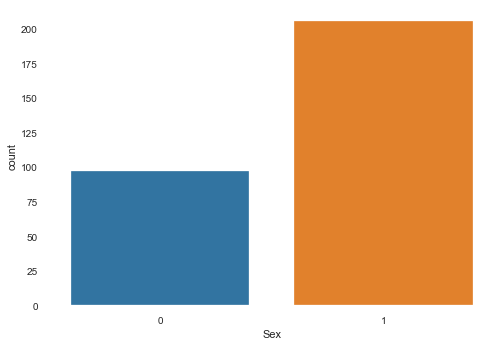

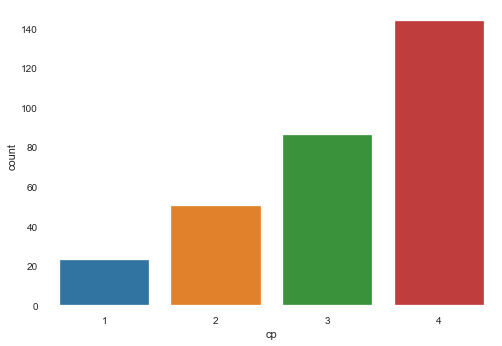

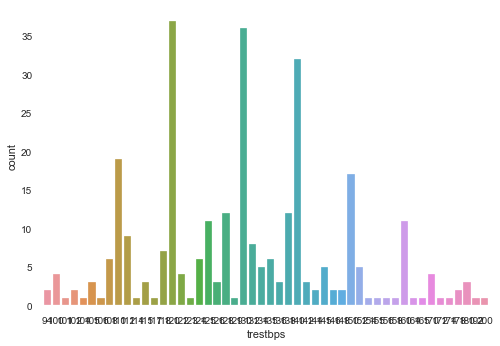

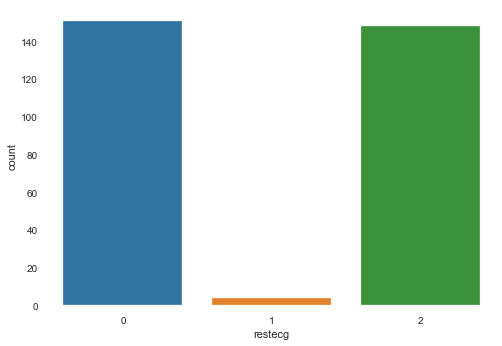

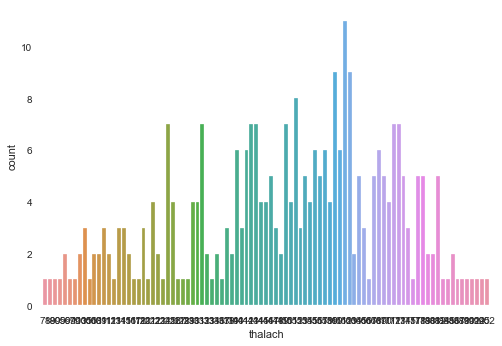

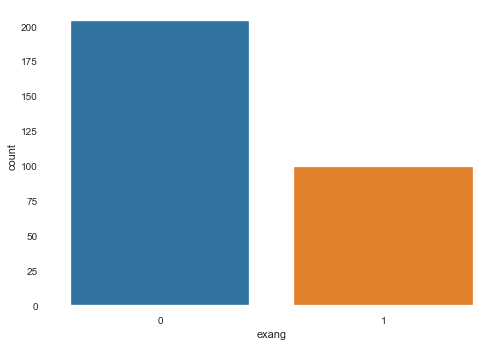

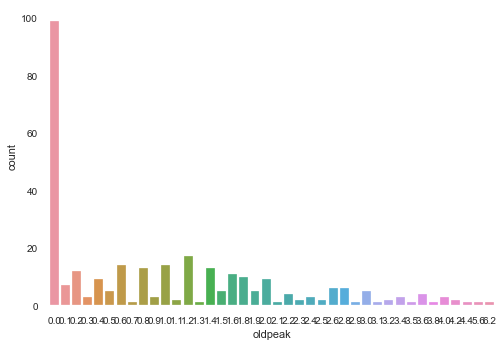

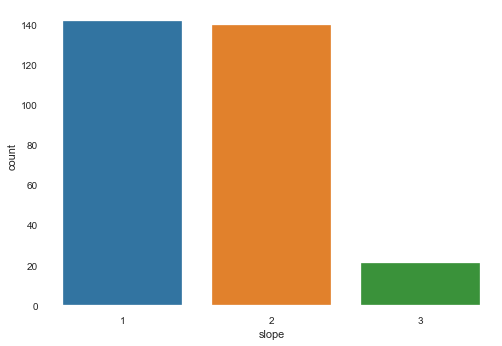

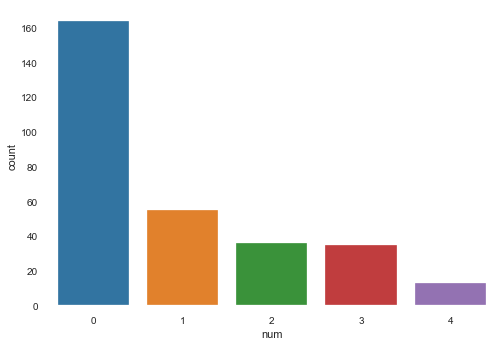

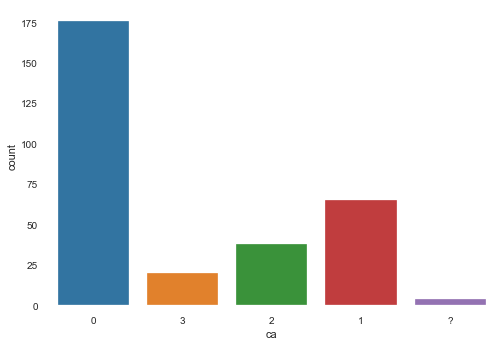

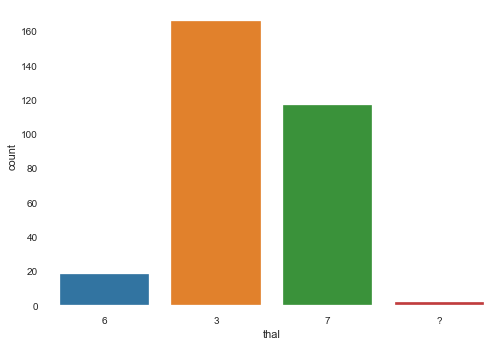

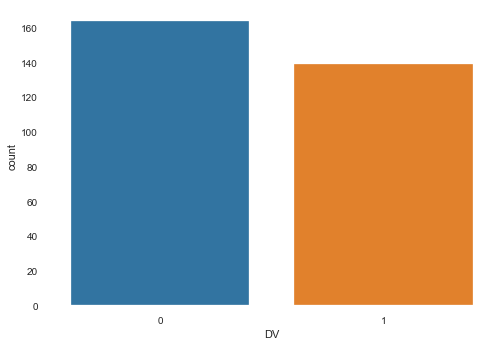

In [14]:
labels=['Age','Sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','num','ca','thal','DV']
for i in range(len(labels)):
    plt.figure()
    sns.countplot(x=data[labels[i]])
    plt.xlabel(labels[i])

In [16]:
data['ca'].value_counts()

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [17]:
data['thal'].value_counts()

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['ca']=lb.fit_transform(data['ca'])
data['thal']=lb.fit_transform(data['thal'])

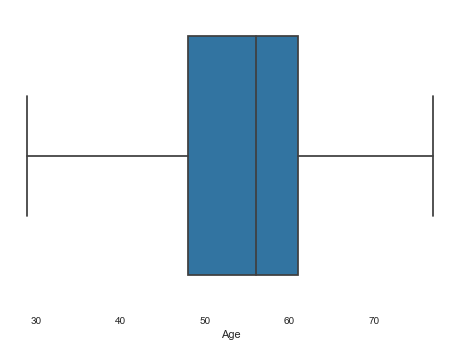

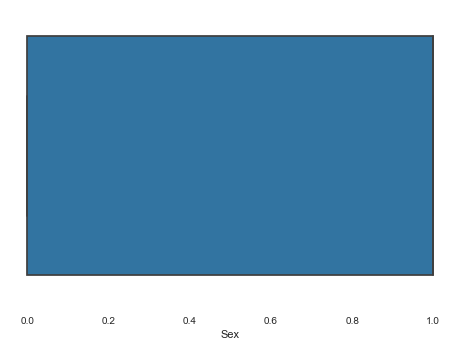

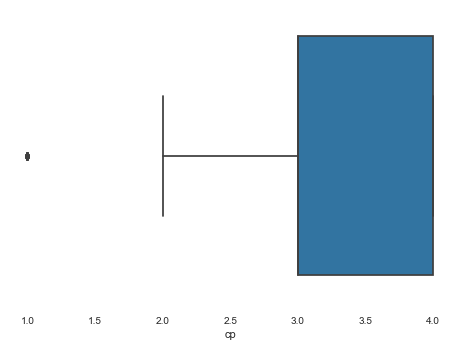

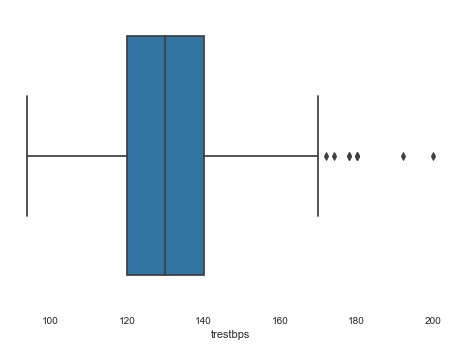

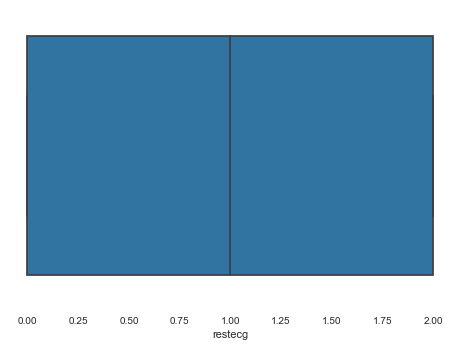

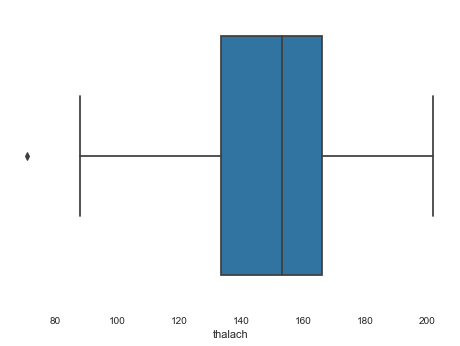

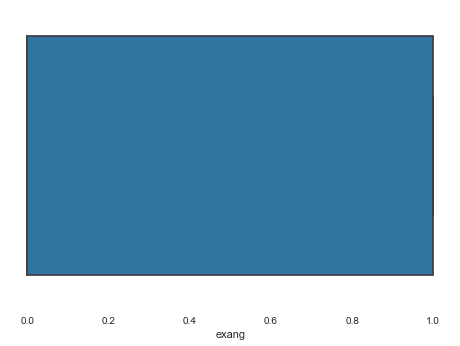

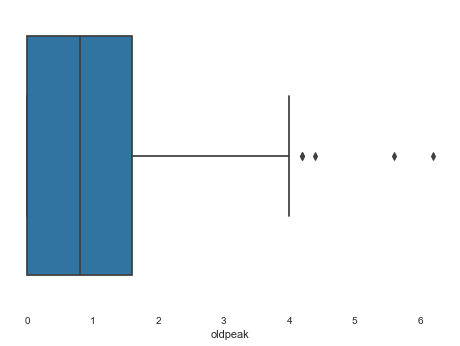

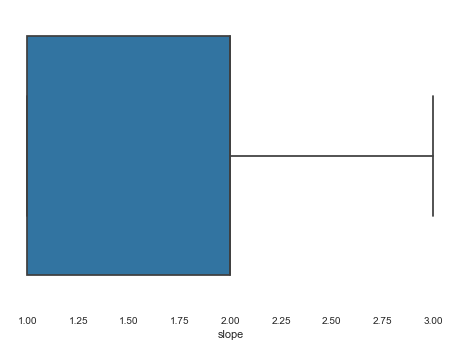

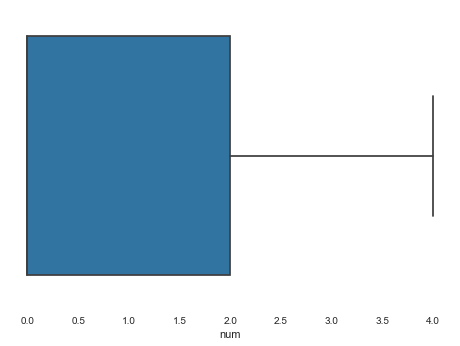

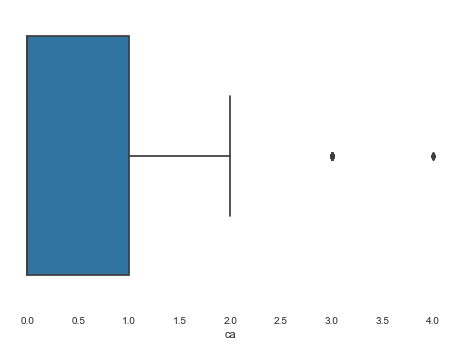

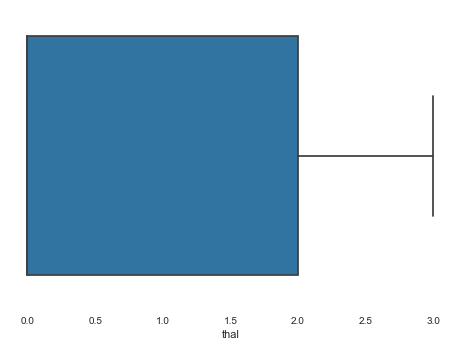

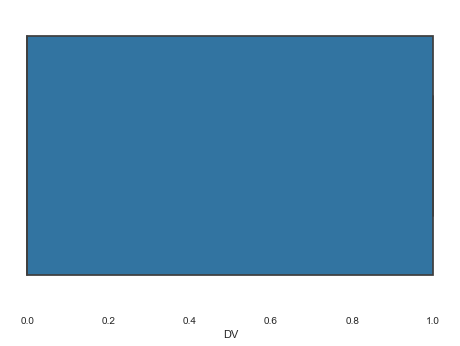

In [19]:
for i in range(len(labels)):
    plt.figure()
    sns.boxplot(data[labels[i]])
    plt.xlabel(labels[i])

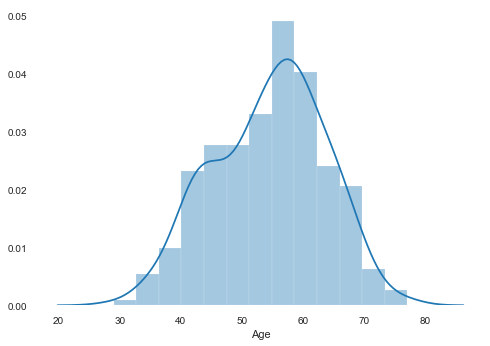

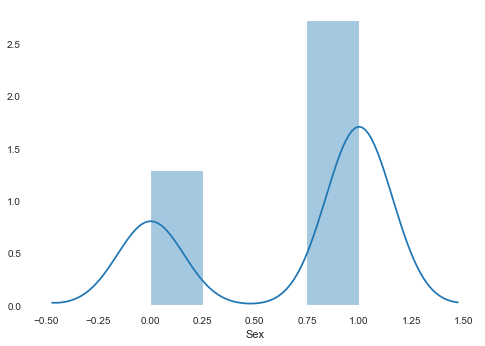

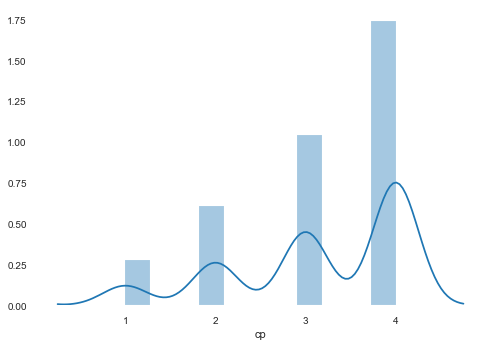

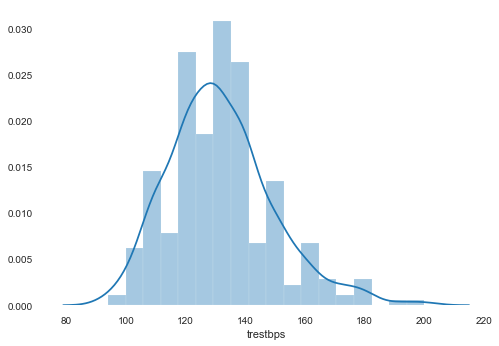

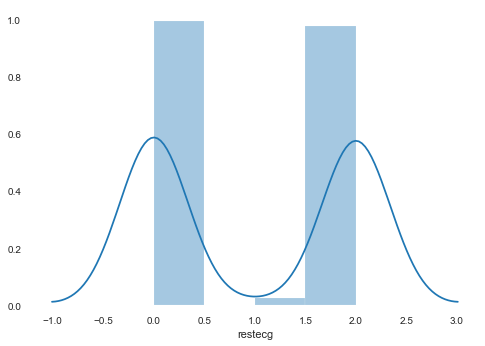

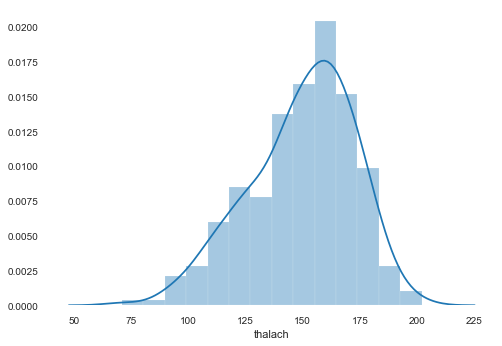

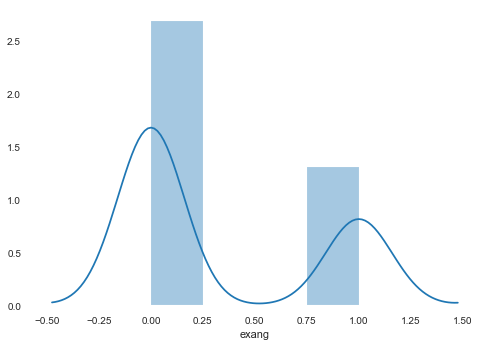

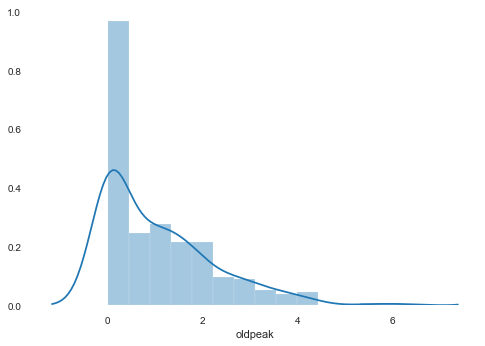

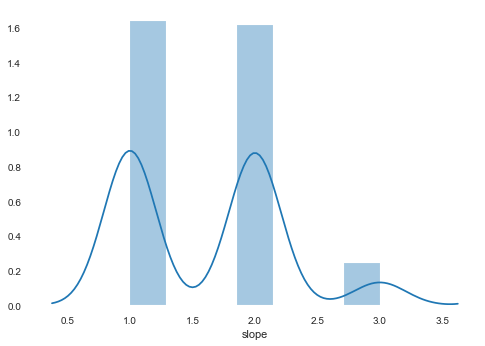

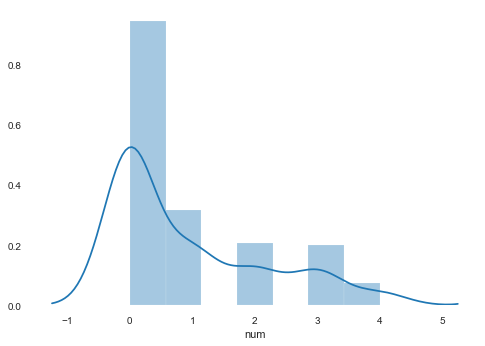

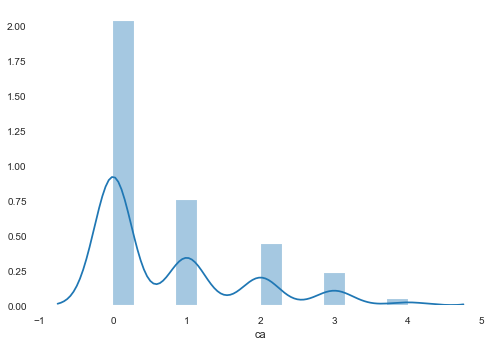

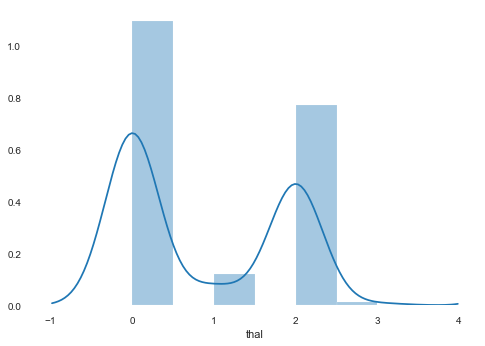

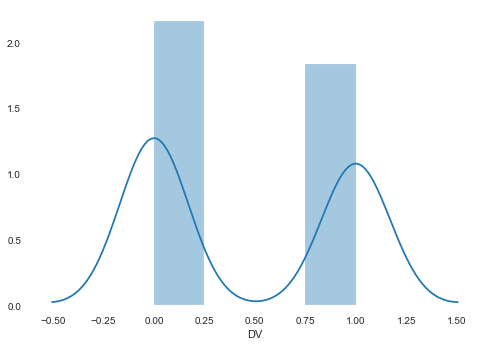

In [20]:
for i in range(len(labels)):
    plt.figure()
    sns.distplot(data[labels[i]])
    plt.xlabel(labels[i])

In [21]:
x=data[['ca','thal']]
y=data['DV']
from sklearn.feature_selection import chi2
chi_scores= chi2(x,y)
chi_scores

(array([70.08756488, 86.97444013]), array([5.67294609e-17, 1.09932770e-20]))

In [22]:
pvalue=pd.Series(chi_scores[1],index=x.columns)
pvalue=pvalue.sort_values(ascending=False,inplace=False)
pvalue

ca      5.672946e-17
thal    1.099328e-20
dtype: float64

In [23]:
labels=['Age','Sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','num','DV']
sk=[]
for i in labels:
    sk.append(data[i].skew())
a=pd.DataFrame({'Variable':labels,'Skew':sk})
a

,Variable,Skew
0,Age,-0.209060
1,Sex,-0.774935
2,cp,-0.841754
3,trestbps,0.706035
4,restecg,0.019900
5,thalach,-0.537449
6,exang,0.742532
7,oldpeak,1.269720
8,slope,0.508316
9,num,1.058496


In [75]:
data['thalach']=(data['thalach'])**2
data['cp']=(data['cp'])**4
data['trestbps']=np.log(data['trestbps'])
data['oldpeak']=np.sqrt(data['oldpeak'])
data['slope']=np.sqrt(data['slope'])
data['num']=(data['num'])**0.25

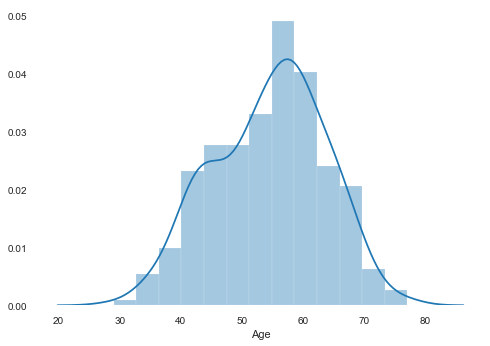

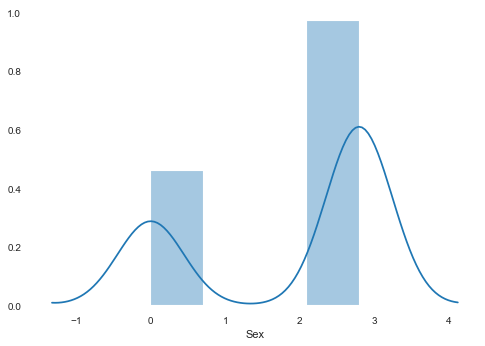

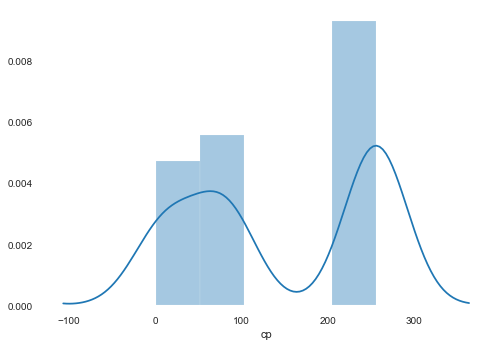

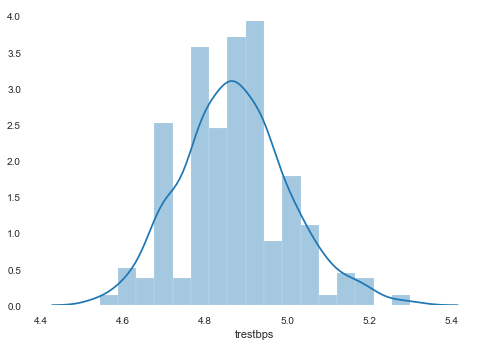

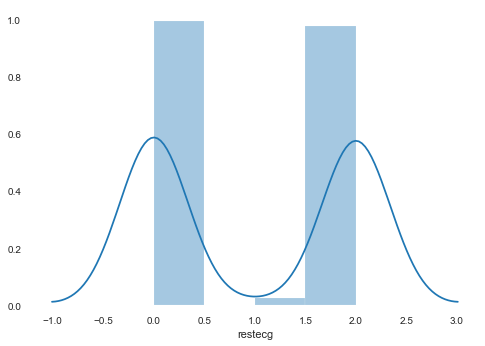

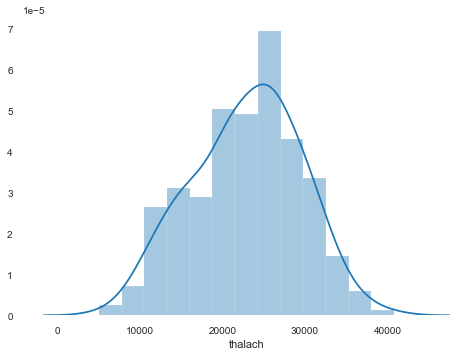

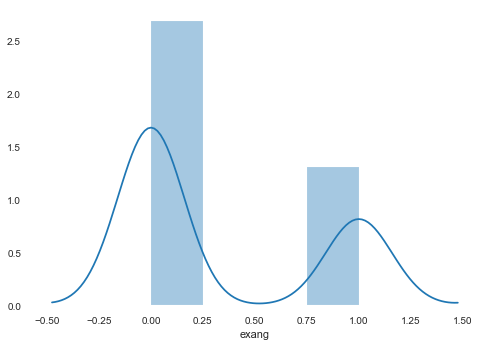

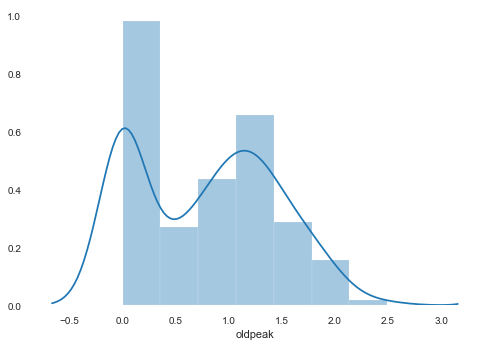

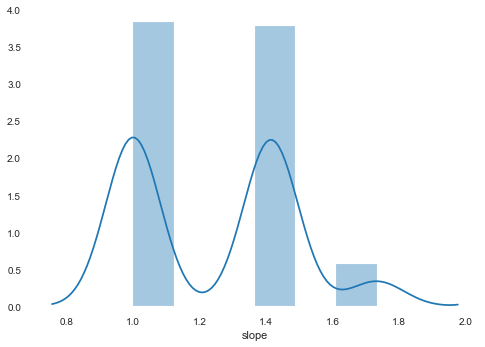

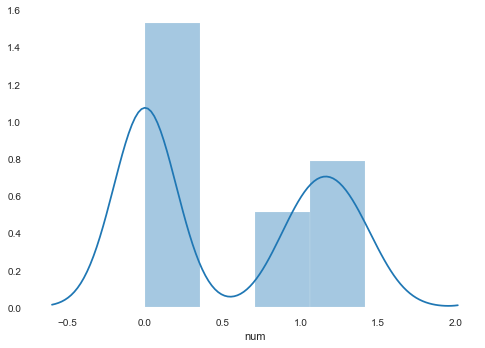

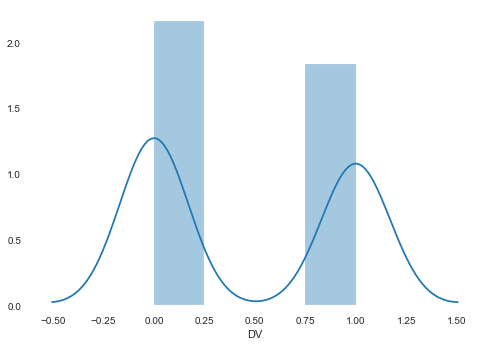

In [76]:
for i in range(len(labels)):
    plt.figure()
    sns.distplot(data[labels[i]])
    plt.xlabel(labels[i])

In [88]:
data.head()

,Age,Sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,num,DV
0,63,2.797139,1,4.976734,2,22500,0,1.516575,1.732051,0,1,0.000000,0
1,67,2.797139,256,5.075174,2,11664,1,1.224745,1.414214,3,0,1.189207,1
2,67,2.797139,256,4.787492,2,16641,1,1.612452,1.414214,2,2,1.000000,1
3,37,2.797139,81,4.867534,0,34969,0,1.870829,1.732051,0,0,0.000000,0
4,41,0.000000,16,4.867534,2,29584,0,1.183216,1.000000,0,0,0.000000,0


In [89]:
x=data.drop('DV',1)
y=data['DV']

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1= sc.fit_transform(x)
x1

array([[ 0.94872647,  0.68620244, -1.37495206, ..., -0.71312935,
         0.15331686, -0.90691674],
       [ 1.39200191,  0.68620244,  1.02044075, ...,  2.27412678,
        -0.87901666,  1.10708214],
       [ 1.39200191,  0.68620244,  1.02044075, ...,  1.27837473,
         1.18565038,  0.7866477 ],
       ...,
       [ 0.28381332,  0.68620244,  1.02044075, ...,  0.28262269,
         1.18565038,  1.32193941],
       [ 0.28381332, -1.4572959 , -1.2340466 , ...,  0.28262269,
        -0.87901666,  0.7866477 ],
       [-1.82174501,  0.68620244, -0.62345628, ...,  3.26987882,
        -0.87901666, -0.90691674]])

In [91]:
scaled_df=pd.DataFrame(x1,index=x.index, columns=x.columns)
scaled_df

,Age,Sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,0.686202,-1.374952,0.804388,1.016684,-0.061301,-0.696631,1.122062,2.037959,-0.713129,0.153317,-0.906917
1,1.392002,0.686202,1.020441,1.559304,1.016684,-1.706037,1.435481,0.677069,0.715850,2.274127,-0.879017,1.107082
2,1.392002,0.686202,1.020441,-0.646867,1.016684,-0.950606,1.435481,1.268258,0.715850,1.278375,1.185650,0.786648
3,-1.932564,0.686202,-0.623456,-0.033037,-0.996749,1.831298,-0.696631,1.662241,2.037959,-0.713129,-0.879017,-0.906917
4,-1.489288,-1.457296,-1.234047,-0.033037,1.016684,1.013939,-0.696631,0.613744,-1.007156,-0.713129,-0.879017,-0.906917
...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,0.686202,-1.374952,-1.314139,-0.996749,-0.831759,-0.696631,0.479908,0.715850,-0.713129,1.185650,0.786648
299,1.502821,0.686202,1.020441,0.751317,-0.996749,-0.458825,-0.696631,1.621193,0.715850,1.278375,1.185650,1.107082
300,0.283813,0.686202,1.020441,-0.033037,-0.996749,-1.469101,1.435481,0.479908,0.715850,0.282623,1.185650,1.321939
301,0.283813,-1.457296,-1.234047,-0.033037,1.016684,1.118974,-0.696631,-1.190466,0.715850,0.282623,-0.879017,0.786648


In [92]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_df,y,test_size=0.3,random_state=42)

In [98]:
clf = SVC(kernel='sigmoid', C=1)
clf.fit(x_train, y_train) 

SVC(C=1, kernel='sigmoid')

In [99]:
clf.score(x_train,y_train)

1.0

In [100]:
clf.score(x_test,y_test)

1.0

In [102]:
pred=clf.predict(x_test)

In [103]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(pred,y_test)

array([[48,  0],
       [ 0, 43]], dtype=int64)

In [104]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        43

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

